In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('wastage.csv')

In [ ]:
def weekend_analyse(df, wastage):
  df['day_of_week'] = pd.to_datetime(df['Date']).dt.weekday
  df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')
  
  grouped = df.groupby('day_type')[wastage].sum()
  total_weekdays = df[df['day_type'] == 'weekday']['day_type'].count()
  total_weekends = df[df['day_type'] == 'weekend']['day_type'].count()

  weekday_data = df[df['day_type'] == 'weekday'][wastage]
  weekend_data = df[df['day_type'] == 'weekend'][wastage]

  weekday_mean = weekday_data.mean()
  weekday_std = weekday_data.std()

  weekend_mean = weekend_data.mean()
  weekend_std = weekend_data.std()
  return weekday_mean, weekday_std, weekend_mean, weekend_std, total_weekdays, total_weekends, grouped

In [ ]:
def plot_analyse(grouped, meal):
  grouped.plot(kind='bar')
  plt.title(f'{meal} wasted on Weekends vs. Weekdays')
  plt.xlabel('Day Type')
  plt.ylabel('Amount Wasted')
  plt.show()

In [ ]:
def plot_confident(df, wastage,meal):
  weekday_data = df[df['day_type'] == 'weekday'][wastage]
  weekend_data = df[df['day_type'] == 'weekend'][wastage]

  # set the parameters for the normal curve
  mu = weekday_data.mean()
  sigma = weekday_data.std()

  # create the x-axis
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

  # calculate the y-axis values for the normal curve
  y = stats.norm.pdf(x, mu, sigma)

  # set the confidence level
  conf_level = 0.95

  # calculate the critical value based on the confidence level
  crit_val = stats.norm.ppf(1 - ((1 - conf_level)/2))

  # calculate the margin of error
  margin_err = crit_val * (sigma)

  # calculate the upper and lower limits of the confidence interval
  upper_lim = mu + margin_err
  lower_lim = mu - margin_err

  # plot the normal curve
  plt.plot(x, y)

  # plot the confidence interval as a shaded region
  plt.fill_between(x, 0, y, where=((x >= lower_lim) & (x <= upper_lim)), color='gray', alpha=0.4)

  # plot the point on the curve corresponding to a particular x value
  plt.plot(weekend_data.mean(), stats.norm.pdf(weekend_data.mean(), mu, sigma), 'ro',label = f"Avg wastage (weekend): {round(weekend_data.mean(),2)}")

  # add labels and title to the plot
  plt.xlabel('Wastage')
  plt.legend()
  plt.ylabel('Probability Density')
  plt.title(f'95% CI for Avg {meal} wastage (weekdays) μ: {round(mu,2)}, σ: {round(sigma,2)}')
  plt.show()

In [ ]:
df_breakfast = df[['Date', 'Menu item Breakfast','Menu item2 Breakfast','Wastage Breakfast']]
df_lunch = df[['Date', 'Menu item Lunch','Menu item2 Lunch','Wastage Lunch']]
df_snack = df[['Date', 'Menu item Snacks','Wastage Snacks']]
df_dinner = df[['Date', 'Menu item Dinner','Menu item2 Dinner','Wastage Dinner']]

<ipython-input-113-0924698c4f42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df['Date']).dt.weekday
<ipython-input-113-0924698c4f42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')


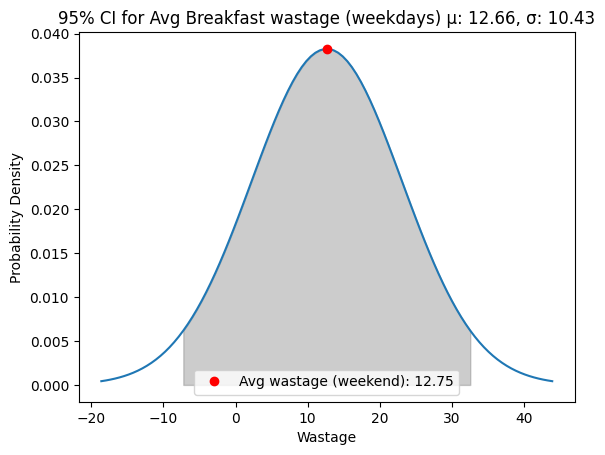

In [ ]:
weekday_mean_bf, weekday_std_bf, weekend_mean_bf, weekend_std_bf, total_weekdays, total_weekends, grouped_bf = weekend_analyse(df_breakfast, 'Wastage Breakfast')

grouped_bf['weekday'] /= total_weekdays
grouped_bf['weekend'] /= total_weekends
# plot_analyse(grouped_bf,"Breakfast")
plot_confident(df_breakfast, 'Wastage Breakfast',"Breakfast")

<ipython-input-113-0924698c4f42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df['Date']).dt.weekday
<ipython-input-113-0924698c4f42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')


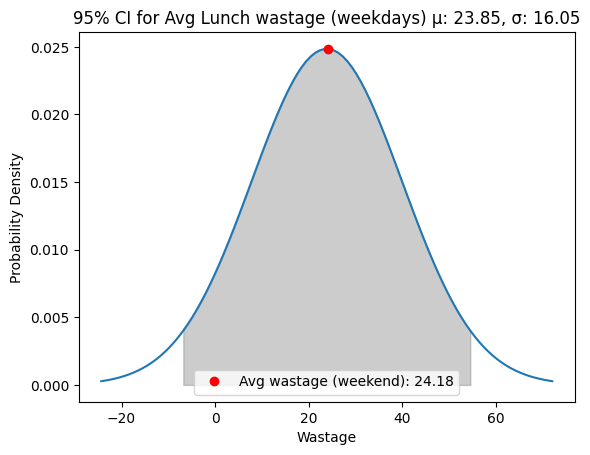

In [ ]:
weekday_mean_l, weekday_std_l, weekend_mean_l, weekend_std_l, total_weekdays, total_weekends, grouped_l = weekend_analyse(df_lunch, 'Wastage Lunch')

grouped_l['weekday'] /= total_weekdays
grouped_l['weekend'] /= total_weekends
# plot_analyse(grouped_l,"Lunch")
plot_confident(df_lunch, 'Wastage Lunch',"Lunch")

<ipython-input-113-0924698c4f42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df['Date']).dt.weekday
<ipython-input-113-0924698c4f42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')


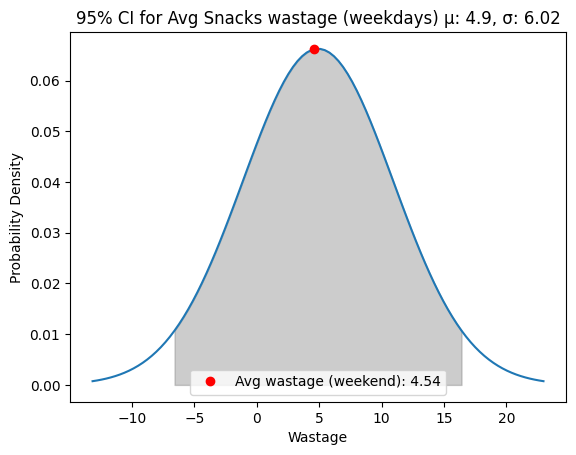

In [ ]:
weekday_mean_s, weekday_std_s, weekend_mean_s, weekend_std_s, total_weekdays, total_weekends, grouped_s = weekend_analyse(df_snack, 'Wastage Snacks')

grouped_s['weekday'] /= total_weekdays
grouped_s['weekend'] /= total_weekends
# plot_analyse(grouped_s,"Snacks")
plot_confident(df_snack, 'Wastage Snacks',"Snacks")

<ipython-input-113-0924698c4f42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = pd.to_datetime(df['Date']).dt.weekday
<ipython-input-113-0924698c4f42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_type'] = df['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'weekday')


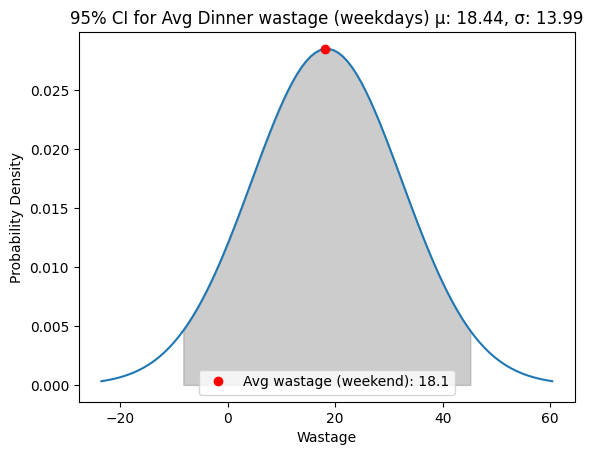

In [ ]:
weekday_mean_d, weekday_std_d, weekend_mean_d, weekend_std_d, total_weekdays, total_weekends, grouped_d = weekend_analyse(df_dinner, 'Wastage Dinner')

grouped_d['weekday'] /= total_weekdays
grouped_d['weekend'] /= total_weekends
# plot_analyse(grouped_d,"Dinner")
plot_confident(df_dinner, 'Wastage Dinner',"Dinner")

### PValue based Hypothesis testing for Breakfast, Lunch, Snacks, Dinner

**Null Hypothesis:** There is no significant difference in the breakfast wastage between the weekdays and weekends

**Alternate Hypothesis:** There is significant difference in the breakfast wastage between the weekdays and weekends

In [ ]:
weekday_data = df_breakfast.loc[df_breakfast['day_type'] == 'weekday', 'Wastage Breakfast']
weekend_data = df_breakfast.loc[df_breakfast['day_type'] == 'weekend', 'Wastage Breakfast']

t_stat, p_val = ttest_ind(weekday_data, weekend_data)

# probability of observing a test static assuming the null hypothesis is true
if p_val < 0.05:
    print('Reject null hypothesis')
else:
    print('May or may not accept null hypothesis')

May or may not accept null hypothesis


**Null Hypothesis:** There is no significant difference in the Lunch wastage between the weekdays and weekends

**Alternate Hypothesis:** There is significant difference in the Lunch wastage between the weekdays and weekends

In [ ]:
weekday_data = df_lunch.loc[df_lunch['day_type'] == 'weekday', 'Wastage Lunch']
weekend_data = df_lunch.loc[df_lunch['day_type'] == 'weekend', 'Wastage Lunch']

t_stat, p_val = ttest_ind(weekday_data, weekend_data)

# probability of observing a test static assuming the null hypothesis is true
if p_val < 0.05:
    print('Reject null hypothesis')
else:
    print('May or may not accept null hypothesis')

May or may not accept null hypothesis


**Null Hypothesis:** There is no significant difference in the Snacks wastage between the weekdays and weekends

**Alternate Hypothesis:** There is significant difference in the Snacks wastage between the weekdays and weekends

In [ ]:
weekday_data = df_snack.loc[df_snack['day_type'] == 'weekday', 'Wastage Snacks']
weekend_data = df_snack.loc[df_snack['day_type'] == 'weekend', 'Wastage Snacks']

t_stat, p_val = ttest_ind(weekday_data, weekend_data)

# probability of observing a test static assuming the null hypothesis is true
if p_val < 0.05:
    print('Reject null hypothesis')
else:
    print('May or may not accept null hypothesis')

May or may not accept null hypothesis


**Null Hypothesis:** There is no significant difference in the Dinner wastage between the weekdays and weekends

**Alternate Hypothesis:** There is significant difference in the Dinner wastage between the weekdays and weekends

In [ ]:
weekday_data = df_dinner.loc[df_dinner['day_type'] == 'weekday', 'Wastage Dinner']
weekend_data = df_dinner.loc[df_dinner['day_type'] == 'weekend', 'Wastage Dinner']

t_stat, p_val = ttest_ind(weekday_data, weekend_data)

# probability of observing a test static assuming the null hypothesis is true
if p_val < 0.05:
    print('Reject null hypothesis')
else:
    print('May or may not accept null hypothesis')

May or may not accept null hypothesis
